# Predicting Stroke in Patients Using Machine Learning
_This is a notebook by Samson Tontoye._

# **Table of Contents**
1. [Problem Definition](#problem)\
2. [Read Data](#read)\
3. [EDA](#eda)\
    2.1 [Custom Color Palette](#color)\
    2.2 [Numeric Variables](#numeric)\
    2.3 [Categorical Variables](#categorical)
 . [Bonus EDA- Odds](#bonus)
4. [Feature Engineering](#features)
5. [Model Building](#models)\
    5.1 [Logistic Regression](#logreg)\
    5.1.1 [Confusion Matrix of LogisticRegression Model](#logreg)\
    5.1.2 [ROC Curve and AUC Scores for the Logistic Regression model](#logreg)\
    5.2 [KNeighborsClassifier](#neighbors)\
    5.2.1 [Confusion Matrix of KNeighborsClassifier Model](#neighbors)\
    5.2.2 [ROC Curve and AUC Scores for the KNeighborsClassifier Model](#neighbors)\
    5.3 [Random Forest](#forest)\
    5.3.1 [Confusion Matrix of RandomForest Model](#forest)\
    5.3.2 [ROC Curve and AUC Scores for the RandomForestClassifier Model](#forest)\
    5.4 [Correlation between independent variables](#correlation)\
6. [Conclusion](#conclusion)



## Introduction
This notebook is a stroke prediction classification machine learning project with an imbalanced class. 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has stroke based on a number of different parameters at a considerable accuracy.


## **1. Problem Definition**

<a id="problem"></a>

In this case, the problem we will be exploring is binary classification.

This is because we're going to be using a number of different features about a person to predict stroke probability.

In a statement,

    Given clinical parameters about a patient, can we predict whether or not a patient is likely to get stroke?
    

## 2. Data

The original data came in a formatted way from kaggle [stroke prediction dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) 

The original database contains 5110 observations with 12 attributes. **Attributes** (also called **features**) are the variables that we'll use to predict our **target variable**.


## 3. Evaluation
The evaluation metric is something to define at the start of a project.

Since machine learning is very experimental,

    If we can reach 95% accuracy at predicting whether or not a patient is likely to get stroke during the proof of concept, we'll pursue this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

## 4. Features
Features are different parts of the data. We're going to visualize the relationships between the different features of the data and how it can lead to stroke.

One of the most common ways to understand the features is to look at the **data dictionary**.

## Stroke Data Dictionary
A data dictionary describes the data you're dealing with, not all datasets come with them. 

The following are the features we'll use to predict our likely target variable (stroke or no stroke).

* 1 id: unique identifier
* 2 gender: "Male", "Female" or "Other"
* 3 age: age of the patient
* 4 hypertension: 
    * 0 if the patient doesn't have hypertension 
    * 1 if the patient has hypertension
* 5 heart_disease: 
    * 0 if the patient doesn't have any heart diseases 
    * 1 if the patient has a heart disease
* 6 ever_married: "No" or "Yes"
* 7 work_type: 
    * "children"
    * "Govt_jov" 
    * "Never_worked" 
    * "Private" or "Self-employed"
* 8 Residence_type: "Rural" or "Urban"
* 9 avg_glucose_level: average glucose level in blood
* 10 bmi: body mass index
* 11 smoking_status: 
    * "formerly smoked" 
    * "never smoked" 
    * "smokes" or "Unknown"*
* 12 stroke: 
    * 1 if the patient had a stroke 
    * 0 if not

**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
## Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# We want our plots to appear in the notebook
%matplotlib inline 

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter

## **2. Read Data**

<a id="read"></a>

In [2]:
df =  pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

## **3. Exploratory Data Analysis**

<a id="eda"></a>

Since EDA has no real set methodolgy, the following is a short check list to to walk through:

1. From the dataframe features, can smoking induce stroke?
2. Can a person with a heart disease be more prone to having stroke?
3. Can a person with hypertension be more prone to having stroke?
4. Does gender play a role in a person being prone to stroke?
5. Does the work type, residence type, average glucose level, bmi, marital status, age play a role in a person having stroke? 
6. What’s missing from the data and how do you deal with it?

In [7]:
# Check the first 5 rows of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
print('Length of entire data:', len(df))
print('Length of non stroke patient:', len(df[df['stroke']==0]))
print('Length of stroke patient:', len(df[df['stroke']==1]))

Length of entire data: 5110
Length of non stroke patient: 4861
Length of stroke patient: 249


Since these two values are not close, our target column can be considered **imbalanced**. An **imbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. From our data dictionary, if the patient has a stroke, it is denoted with 1, if the patient does not have stroke, it is denoted as 0.

In [9]:
# Normalized value counts
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the pandas dataframe above,
* id, hypertension, heart_disease and stroke are int datatype.
* gender, ever_married, work_type, Residence_type and smoking_status are object datatype.
* age, avg_glucose_level and bmi are float datatype.

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
# Check for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

bmi


In [14]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # Add a binary column which tells if the data was missing or not
            df[label+"_is_missing"] = pd.isnull(content)
            
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())

In [15]:
# Check if there's any null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Replacing 0 and 1 with "No" and "Yes" in Hypertension and Heart Disease columns.

In [16]:
df['hypertension'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['heart_disease'].replace([0, 1], ['No', 'Yes'], inplace=True)

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,False
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,False
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False


Categorising BMI into "Underweight", "Normal Weight", "Overweight" and "Obese".

In [18]:
results=[]

for i in df['bmi']:
    if (i < 19.5):
        results.append('Underweight')
   
    elif (i >= 19.5) & (i < 25.5):
        results.append('Normal Weight')
        
    elif (i >= 25.5) & (i < 30.0):
        results.append('Overweight')
        
    elif (i > 30.0):
        results.append('Obese')
        
results2 = pd.DataFrame(results, columns=['bmi_category'])

df['bmi_category']=results2

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Obese
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Overweight
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Obese
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,False,Obese
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Normal Weight


In [19]:
# Check for missing values
df.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
bmi_is_missing        0
bmi_category         27
dtype: int64

<p style="text-align:center;">Investigate numeric variables- age, glucose, bmi</p>

<p style="text-align:center;">Histograms for each, their effect on strokes.</p>

<p style="text-align:center;">Potentially graph their effects</p>

#### 2.1 Create Custom Color Palette

<a id="color"></a>

Text(-0.5, -0.7, 'Color Palette For This Notebook')

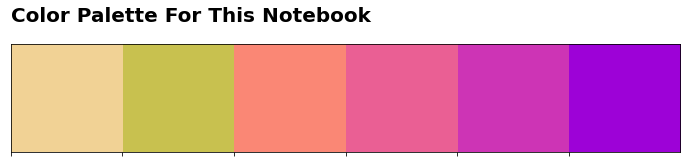

In [20]:
colors = ["#f1d295", "#c8c14f", "#fa8775", "#ea5f94", "#cd34b5", "#9d02d7"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size = 2)
plt.text(-0.5, -0.7, 'Color Palette For This Notebook', size = 20, weight = 'bold')

#### 2.2 Numeric Variables

<a id="numeric"></a>

<p style="text-align:center;"><b>Frequency of Ages.</b></p>

In [21]:
df_age = df.groupby('age', as_index=False)['stroke'].sum()
fig = px.histogram(df_age, 
                   x = "age",
                   y = "stroke", 
                   barmode = "group", 
                   nbins = 10, 
                   opacity = 0.75, 
                   range_x = [0,85],
                   color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(height = 500, 
                  width = 700, 
                  title_text ='Frequency of Ages',
                  title_font_size= 20,
                  title_y = 0.97,
                  title_x = 0.48,
                  yaxis_title = 'Count')

fig.show()

Text(0, 0.5, 'Count')

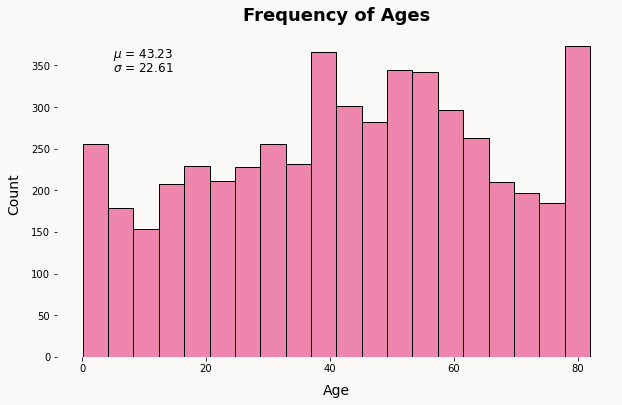

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['age'],
    kde = False,
    color = "#ea5f94"
)

for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)

plt.text(5, 360, r'$\mu$ = '+str(round(df['age'].mean(), 2)), fontsize = 12)
plt.text(5, 343, r'$\sigma$ = '+str(round(df['age'].std(), 2)), fontsize = 12)
plt.title('Frequency of Ages', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Age', fontsize = 14, labelpad = 10)
plt.ylabel('Count', fontsize = 14, labelpad = 10)

<p style="text-align:center;"><b>Frequency of Glucose Levels.</b></p>

Text(0, 0.5, 'Count')

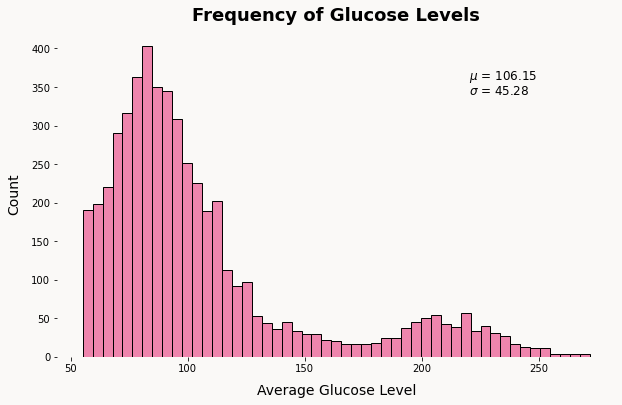

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['avg_glucose_level'],
    color = "#ea5f94",
    kde = False
)

for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)


plt.text(220, 360, r'$\mu$ = '+str(round(df['avg_glucose_level'].mean(), 2)), fontsize = 12)
plt.text(220, 340, r'$\sigma$ = '+str(round(df['avg_glucose_level'].std(), 2)), fontsize = 12)
plt.title('Frequency of Glucose Levels', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Average Glucose Level', fontsize = 14, labelpad = 10)
plt.ylabel('Count', fontsize = 14, labelpad = 10)

### Check for Outliers in the BMI

In [24]:
bmi=list(df['bmi'].values)
hist_data=[bmi]

group_lables=['bmi']
colour=['Red']

fig=ff.create_distplot(hist_data,group_lables,show_hist=True,colors=colour)
fig.show()
print("The shape before removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5110, 14)


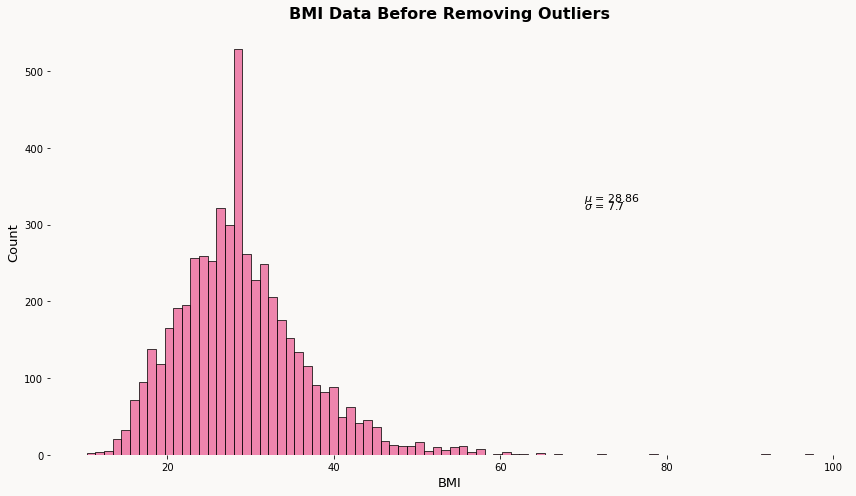

In [25]:
fig, ax = plt.subplots(figsize = (12, 7))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['bmi'],
    color = "#ea5f94",
    kde = False
)

ax.text(70, 330, r'$\mu$ = '+str(round(df['bmi'].mean(), 2)), fontsize = 11)
ax.text(70, 320, r'$\sigma$ = '+str(round(df['bmi'].std(), 2)), fontsize = 11)
ax.set_title('BMI Data Before Removing Outliers', fontsize = 16, fontweight = 'bold', pad = 10)
ax.set_xlabel('BMI', fontsize = 13)
ax.set_ylabel('Count', fontsize = 13)


for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)

plt.tight_layout()

**Observation**:

From the histogram above, the distribution of the histogram is a normal distribution, outliers are present on the right side of the histogram and due to the outliers, the histogram plot is right skewed, we can either remove the outliers or the distribution curve can be made less-skewed by mapping the values with a log but both cases will lead to loss of the number of datapoints with Stroke = 1

In [27]:
bmi=list(df['bmi'].values)
hist_data=[bmi]

group_lables=['bmi']
colour=['Red']

fig=ff.create_distplot(hist_data,group_lables,show_hist=True,colors=colour)
fig.show()

df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape after removing the BMI outliers :  (4993, 14)


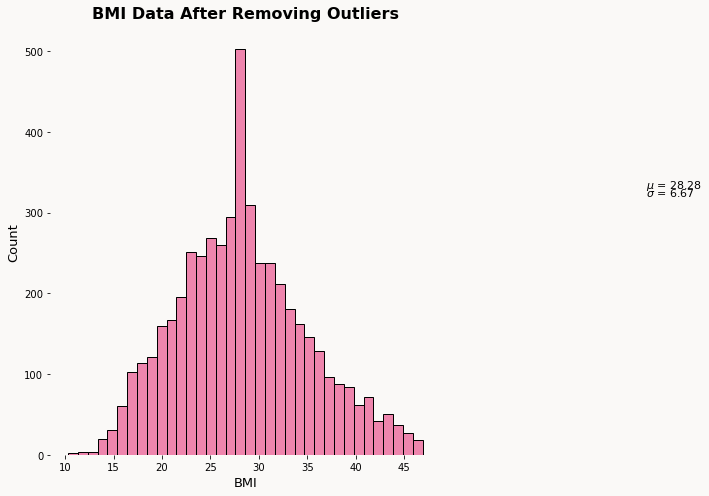

In [28]:
fig, ax = plt.subplots(figsize = (12, 7))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['bmi'],
    color = "#ea5f94",
    kde = False
)

ax.text(70, 330, r'$\mu$ = '+str(round(df['bmi'].mean(), 2)), fontsize = 11)
ax.text(70, 320, r'$\sigma$ = '+str(round(df['bmi'].std(), 2)), fontsize = 11)
ax.set_title('BMI Data After Removing Outliers', fontsize = 16, fontweight = 'bold', pad = 10)
ax.set_xlabel('BMI', fontsize = 13)
ax.set_ylabel('Count', fontsize = 13)
df.drop(df[df['bmi'] > 47].index, inplace = True)


for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)

plt.tight_layout()

**Observation**:

After removing the outliers, the range is now between 10 and 47 which is where most of the bmi samples are distributed. 

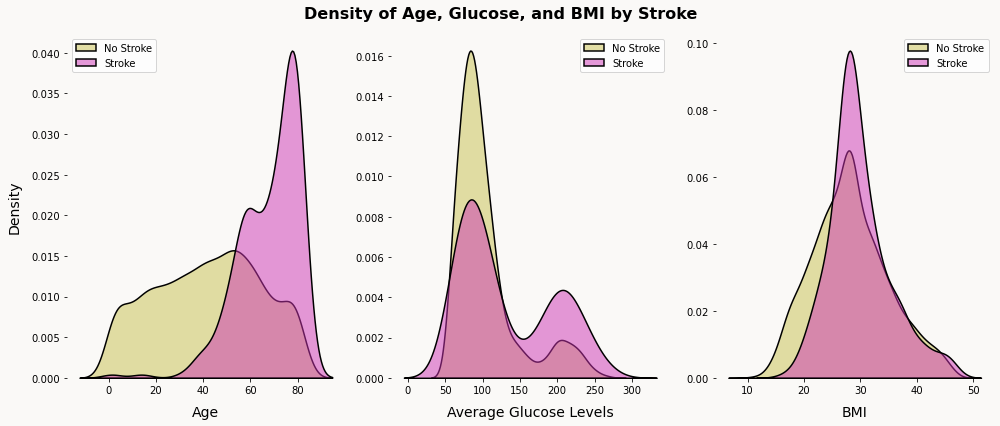

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
fig.patch.set_facecolor('#faf9f7')

for i in (ax1, ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke'] == 0],
    ax = ax1,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['age'][df['stroke'] == 1],
    ax = ax1,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age', fontsize = 14, labelpad = 10)
ax1.set_ylabel('Density', fontsize = 14, labelpad = 10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax2.legend(['No Stroke', 'Stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontsize = 16, fontweight = 'bold')

for i in (ax1, ax2, ax3):
    for j in ['top', 'left', 'bottom', 'right']:
        i.spines[j].set_visible(False)

fig.tight_layout()

<p style="text-align:center;"><b>Scatter plots of numerical variables colored by stroke.</b></p>

In [30]:
stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]

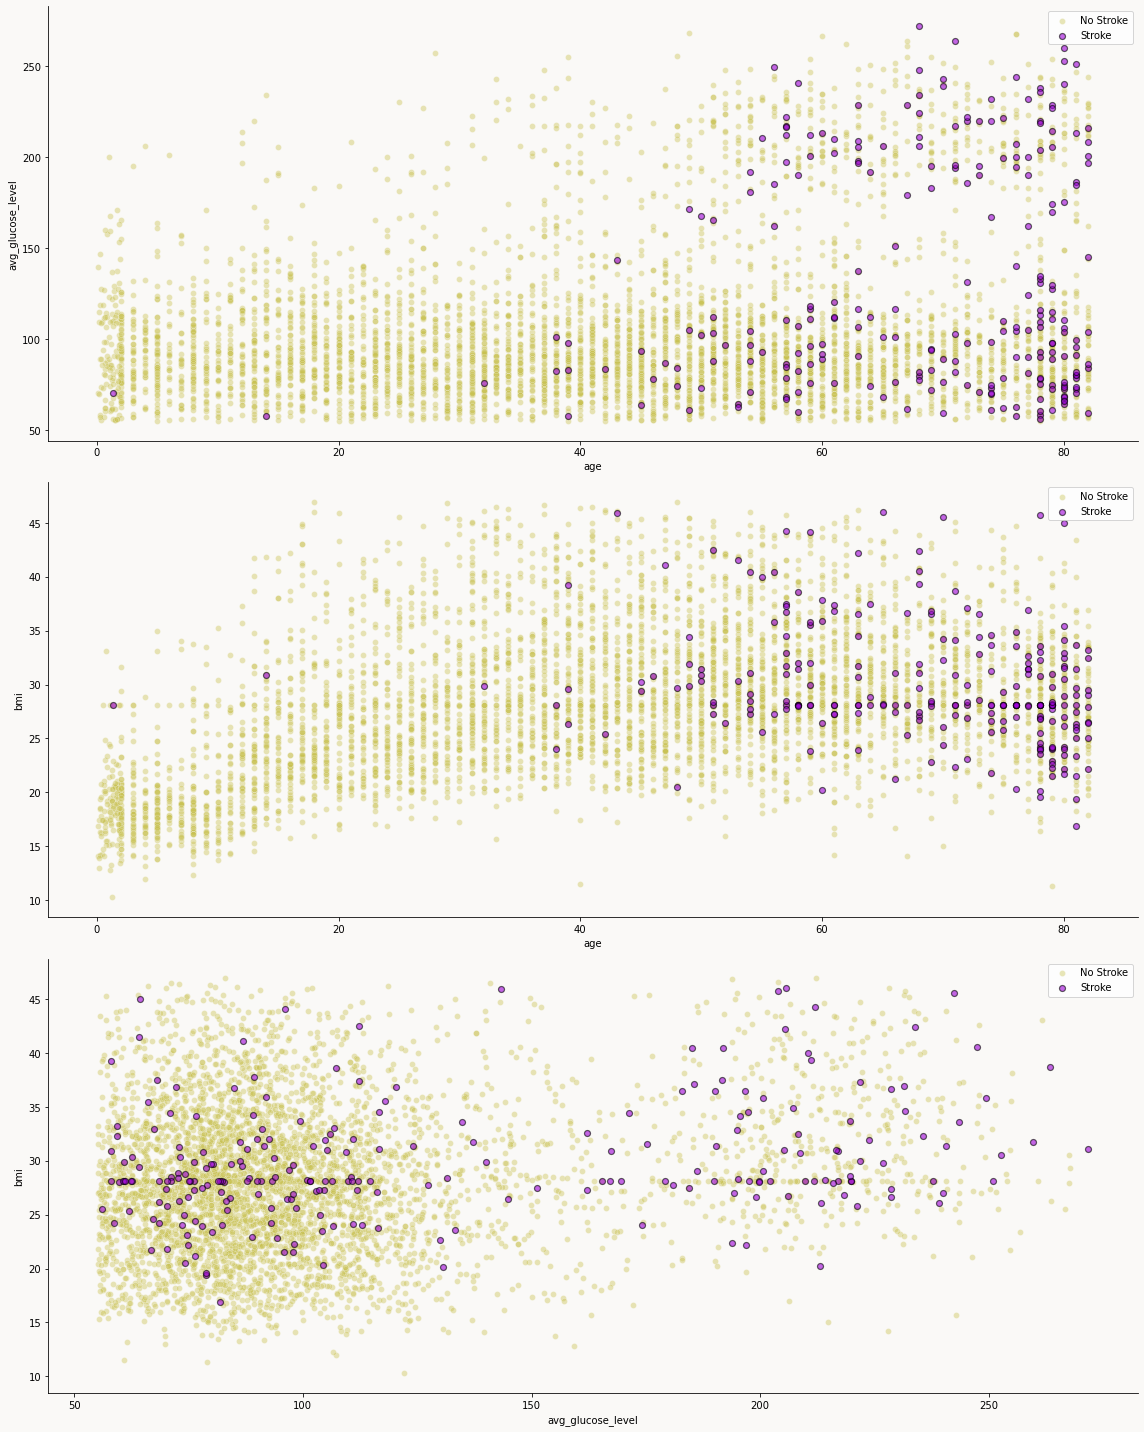

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(16,20))
fig.patch.set_facecolor('#faf9f7')
for j in range(0, 3):
    ax[j].set_facecolor('#faf9f7')

## Age vs Glucose Levels
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'avg_glucose_level', color = '#c8c14f',
    alpha = 0.4, ax = ax[0]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'avg_glucose_level', color = "#9d02d7",
    ax = ax[0], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Age vs BMI
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'bmi', color = '#c8c14f',
    alpha = 0.4, ax = ax[1]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'bmi', color = "#9d02d7",
    ax = ax[1], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Glucose Levels vs BMI
sns.scatterplot(
    data = no_stroke, x = 'avg_glucose_level', y = 'bmi', color = '#c8c14f',
    alpha = 0.4, ax = ax[2]
)
sns.scatterplot(
    data = stroke, x = 'avg_glucose_level', y = 'bmi', color = "#9d02d7",
    ax = ax[2], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)
    
sns.despine()

for i in range(0, 3, 1):
    ax[i].legend(['No Stroke', 'Stroke'])

fig.tight_layout()

#### Age vs Average Glucose Level for Stroke

**Observation**:

It seems the older a person is, the higher their average glucose level (red dots are higher on the right of the graph). Also, a large proportion of the scatter plot points on the y-axis are concentrated between (50-150), and from my observation, it looks like there are outliers upwards of 150 which indicates people with a high glucose level which might be a factor in causing stroke for older people.

#### Age vs BMI for Stroke
**Observation:**

From the scatterplot above, the likelihood of a person having stroke is high if the person is overweight or obese(>30).

#### 2.3 Categorical Variables

<a id="categorical"></a>

<p style="text-align:center;"><b>Let's first investigate the target variable.</b></p>

Text(0.5, 1.0, 'Percentage of Strokes')

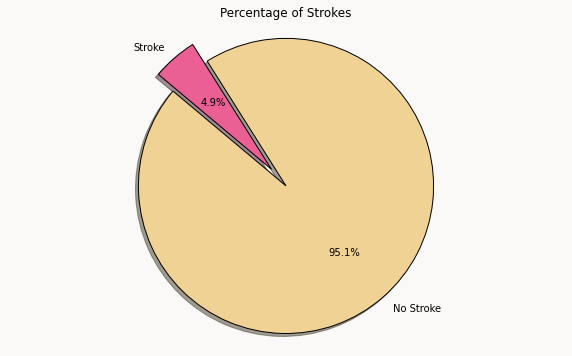

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

labels = ['No Stroke', 'Stroke']
colors = ["#f1d295", "#ea5f94"]
sizes = df['stroke'].value_counts()

plt.pie(sizes, explode = [0, 0.15], labels = labels, colors = colors,
           autopct = '%1.1f%%', shadow = True, startangle = 140,
           wedgeprops = {'ec': 'black'}, textprops = {'fontweight': 'medium'}
)
plt.axis('equal')
plt.title('Percentage of Strokes')

<p style="text-align:center;"><b>Gender</b></p>

In [33]:
male_str = 0
fem_str = 0
male_nstr = 0
fem_nstr = 0

for index, row in df.iterrows():
    if row['gender'] == 'Male':
        if row['stroke'] == 1:
            male_str += 1
        else:
            male_nstr += 1
    else:
        if row['stroke'] == 1:
            fem_str += 1
        else:
            fem_nstr += 1

print(male_str, fem_str, male_nstr, fem_nstr)

108 138 1981 2766


In [34]:
df.gender.value_counts()

Female    2903
Male      2089
Other        1
Name: gender, dtype: int64

In [35]:
# Remove the 'other' gender
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
# Compare stroke column with gender column
pd.crosstab(df.stroke, df.gender)

gender,Female,Male
stroke,,
0,2765,1981
1,138,108


Text(0.5, 50.0, 'Stroke')

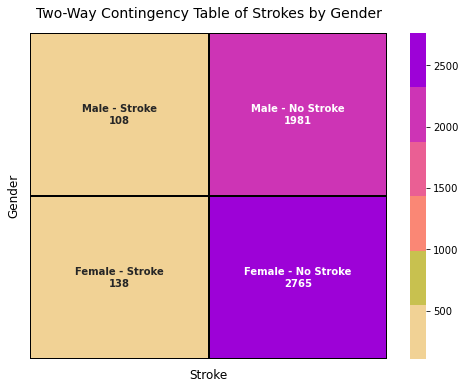

In [37]:
plt.subplots(figsize=(8,6))

stroke_matrix = np.array([[108, 1981], [138, 2765]])
labels = np.array([['Male - Stroke', 'Male - No Stroke'], ['Female - Stroke', 'Female - No Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), stroke_matrix.flatten())])).reshape(2,2)


sns.heatmap(
    stroke_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    xticklabels = False,
    yticklabels = False,
    linecolor = 'black',
    linewidth = 1,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Gender', pad = 15, fontsize = 14)
plt.ylabel('Gender', fontsize = 12, labelpad = 10)
plt.xlabel('Stroke', fontsize = 12, labelpad = 10)

**Observation**:

Since there are 2903 women, 2765 women do not have stroke and 138 of them have a stroke, we might infer, based on this one variable if the participant is a woman, there's a 5% chance she will have a stroke.

As for males, there are 2089 males, 1981 men do not have stroke and 108 of them have a stroke. So we might predict, if the participant is male, 5.45% chance he will have stroke.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 5.27% chance they have stroke.

<p style="text-align:center;"><b>Heart Disease</b></p>

In [38]:
heart_cont = pd.crosstab(df['heart_disease'], df['stroke'])
heart_cont

stroke,0,1
heart_disease,,
No,4518,199
Yes,228,47


Text(0.5, 50.0, 'Stroke')

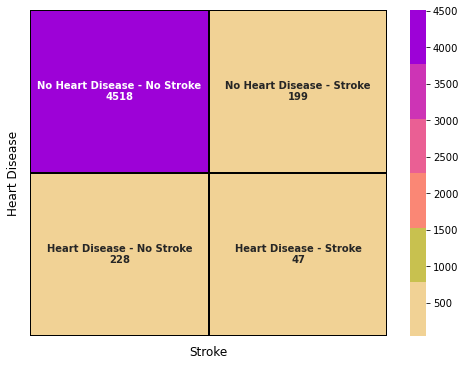

In [39]:
plt.subplots(figsize=(8,6))

heart_matrix = np.array([[4518, 199], [228, 47]])
labels = np.array([['No Heart Disease - No Stroke', 'No Heart Disease - Stroke'], ['Heart Disease - No Stroke', 'Heart Disease - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), heart_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    heart_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Heart Disease', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

**Observation:**

From the visualization above, people that do not have a heart disease tend to be more susceptible to having stroke than those with heart disease.

<p style="text-align:center;"><b>Hypertension</b></p>

In [40]:
hyper_cont = pd.crosstab(df['hypertension'], df['stroke'])
hyper_cont

stroke,0,1
hypertension,,
No,4334,181
Yes,412,65


Text(0.5, 50.0, 'Stroke')

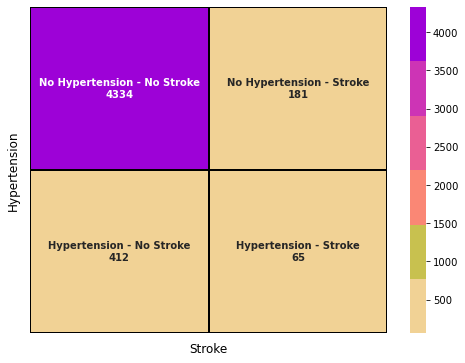

In [41]:
plt.subplots(figsize=(8,6))

hyper_matrix = np.array([[4334, 181], [412, 65]])
labels = np.array([['No Hypertension - No Stroke', 'No Hypertension - Stroke'], ['Hypertension - No Stroke', 'Hypertension - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), hyper_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    hyper_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Hypertension', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

**Observation:**

From the visualization above, we can see that patients that do not have hypertension slightly have a higher chance of having stroke while there is a chance that those that have hypertension can get stroke also but the likelihood of having stroke is far lesser for people with hypertension than those without hypertension. 

<p style="text-align:center;"><b>Residence Type</b></p>

In [42]:
df.groupby('Residence_type')['stroke'].value_counts()

Residence_type  stroke
Rural           0         2334
                1          113
Urban           0         2412
                1          133
Name: stroke, dtype: int64

In [43]:
res_cont = pd.crosstab(df['Residence_type'], df['stroke'])
res_cont

stroke,0,1
Residence_type,,
Rural,2334,113
Urban,2412,133


Text(0.5, 50.0, 'Stroke')

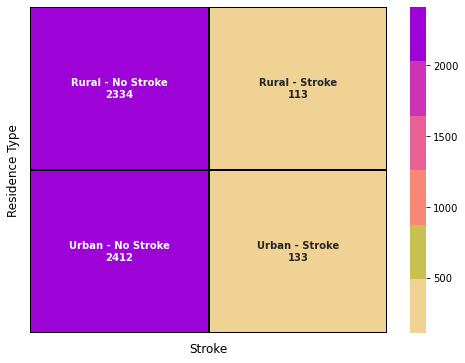

In [45]:
plt.subplots(figsize=(8,6))

res_matrix = np.array([[2334, 113], [2412, 133]])
labels = np.array([['Rural - No Stroke', 'Rural - Stroke'], ['Urban - No Stroke', 'Urban - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), res_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    res_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Residence Type', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

**Observation:**

From the visualization above, the likelihood of a person having stroke is slightly higher if the person lives in an urban area. But the likelihood of having stroke is almost similar for people living in rural and urban areas.

<p style="text-align:center;"><b>Ever Married</b></p>

In [47]:
df.groupby('ever_married')['stroke'].value_counts()

ever_married  stroke
No            0         1702
              1           29
Yes           0         3044
              1          217
Name: stroke, dtype: int64

In [48]:
mar_cont = pd.crosstab(df['ever_married'], df['stroke'])
mar_cont

stroke,0,1
ever_married,,
No,1702,29
Yes,3044,217


Text(0.5, 50.0, 'Stroke')

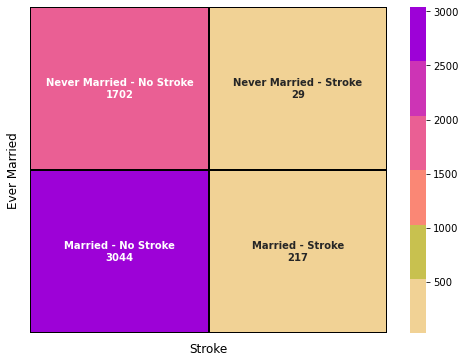

In [49]:
plt.subplots(figsize=(8,6))

mar_matrix = np.array([[1702, 29], [3044, 217]])
labels = np.array([['Never Married - No Stroke', 'Never Married - Stroke'], ['Married - No Stroke', 'Married - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), mar_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    mar_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Ever Married', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

**Observation:**

The probability of having stroke is higher for people that have gotten married at some point or still married than people that have never married. One factor could be that people that get married on average tend to be older people and the propensity to have stroke tend to be higher for older people.

<p style="text-align:center;"><b>Smoking Status</b></p>

In [50]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [51]:
df.groupby('smoking_status')['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1472
                 1           47
formerly smoked  0          791
                 1           70
never smoked     0         1753
                 1           87
smokes           0          730
                 1           42
Name: stroke, dtype: int64

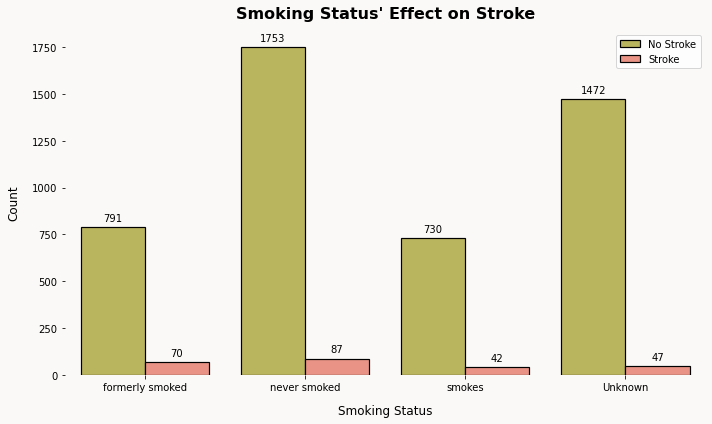

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

s = sns.countplot(
    data = df, x = 'smoking_status', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Smoking Status' Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Smoking Status', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in s.patches:
    s.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()

**Observation:**

From the bar chart above, People that have never smoked tend to be more susceptible to having stroke than those that are still smoking and those that formerly smoked.

<p style="text-align:center;"><b>Work Type</b></p>

In [53]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

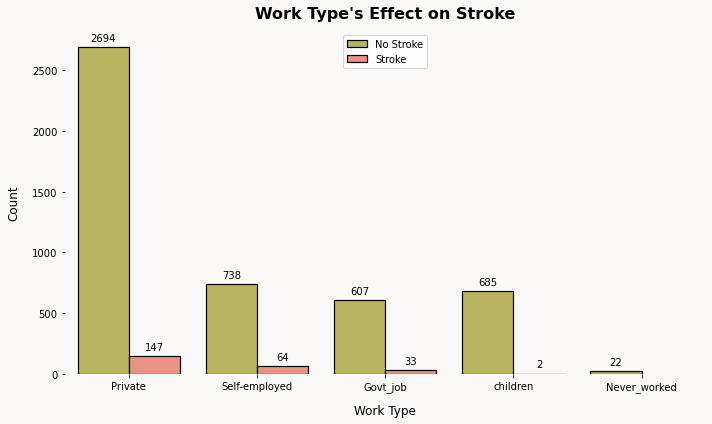

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

w = sns.countplot(
    data = df, x = 'work_type', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Work Type's Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Work Type', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in w.patches:
    w.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()

**Observation:**
    
From the bar chart above, the likelihood of a person having stroke is higher if the person works for a private company.

## **3. Bonus EDA - Odds**

<a id="bonus"></a>

In [55]:
gen_odds = (108 * 2854) / (141 * 2007)

heart_odds = (229 * 202) / (4632 * 47)

hyper_odds = (432 * 183) / (4429 * 66)

res_odds = (2400 * 135) / (2461 * 114)

mar_odds = (1728 * 220) / (3133 * 29)

d = {
    'Features': ['Gender', 'Heart Disease', 'Hypertension',
                'Residence', 'Married'],
    'Odds': [gen_odds, heart_odds, hyper_odds, res_odds, mar_odds]
}

odds_df = pd.DataFrame(data = d)
odds_df

,Features,Odds
0,Gender,1.089209
1,Heart Disease,0.212481
2,Hypertension,0.270449
3,Residence,1.154858
4,Married,4.184158


<p style="text-align:center;">Most features seem to have little difference in their odds. The ever married variable has a 4 to 1 odds of having a stroke for individuals that were never married.</p>

<p style="text-align:center;"><b>Stroke Frequency per Age and Gender combined.</b></p>

In [56]:
df_age_gender = df.groupby(['gender', 'age'], as_index=False)['stroke'].sum()
fig = px.histogram(df_age_gender,
                   x = 'age',
                   y = 'stroke',
                   color = 'gender',
                   barmode = 'group',
                   nbins = 10,
                   opacity = 0.75,
                   color_discrete_sequence = px.colors.qualitative.Prism)

fig.update_layout(height = 500,
                  width = 700,
                  title_text = 'Stroke frequency per Age and Gender',
                  title_font_size = 20,
                  title_y = 0.95,
                  title_x = 0.48,
                  yaxis_title = 'Stroke Frequency')

fig.show()

**Observation:**

The histogram above indicates that the older a person gets, the more likely they are to have stroke and if the gender is female, the older a female gets, the more likely she is to get stroke compared to a male except between the ages of 55-64 where men are more likely to have stroke in comparison to females.

## **4. Feature Engineering**

<a id="features"></a>

### Categorical  Encoding using LabelEncoder

In [57]:
# Check the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Obese
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Overweight
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Obese
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,False,Obese
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Normal Weight


In [58]:
# Check the datatype
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
bmi_is_missing          bool
bmi_category          object
dtype: object

In [59]:
# Replace the no and yes with int 0, 1
df['hypertension'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['heart_disease'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [60]:
# Check the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Normal Weight


In [61]:
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = ['sex', 'work', 'residence', 'smoke'])
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,bmi_is_missing,bmi_category,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,Yes,228.69,36.6,1,False,Obese,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,Yes,202.21,28.1,1,True,Overweight,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,Yes,105.92,32.5,1,False,Obese,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,Yes,171.23,34.4,1,False,Obese,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,Yes,174.12,24.0,1,False,Normal Weight,...,0,0,1,0,1,0,0,0,1,0


In [62]:
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,bmi_is_missing,bmi_category,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,1,228.69,36.6,1,False,Obese,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,1,202.21,28.1,1,True,Overweight,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,105.92,32.5,1,False,Obese,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,171.23,34.4,1,False,Obese,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,1,174.12,24.0,1,False,Normal Weight,...,0,0,1,0,1,0,0,0,1,0


<p style="text-align:center;">Scale continuous features if you are using distance-based algorithms such as k-nearest neighbors. Since we will be using knn, we will scale our features.</p>

In [63]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [64]:
# Drop the ID Column
df = df.drop('id', axis = 1)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,bmi_is_missing,bmi_category,sex_Female,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.045452,0,1,1,2.740094,1.247750,1,False,Obese,0,...,0,1,0,0,0,1,0,1,0,0
1,0.782040,0,0,1,2.149816,-0.026910,1,True,Overweight,1,...,0,0,1,0,1,0,0,0,1,0
2,1.616179,0,1,1,0.003371,0.632914,1,False,Obese,0,...,0,1,0,0,1,0,0,0,1,0
3,0.255216,0,0,1,1.459227,0.917838,1,False,Obese,1,...,0,1,0,0,0,1,0,0,0,1
4,1.572277,1,0,1,1.523649,-0.641746,1,False,Normal Weight,1,...,0,0,1,0,1,0,0,0,1,0


After converting the categorical columns into numerical variables, drop the bmi_is_missing and bmi_category columns.

In [65]:
# Drop bmi_is_missing and bmi category column
df.drop(['bmi_is_missing', 'bmi_category'], axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.045452,0,1,1,2.740094,1.247750,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0.782040,0,0,1,2.149816,-0.026910,1,1,0,0,0,0,1,0,1,0,0,0,1,0
2,1.616179,0,1,1,0.003371,0.632914,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0.255216,0,0,1,1.459227,0.917838,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,1.572277,1,0,1,1.523649,-0.641746,1,1,0,0,0,0,1,0,1,0,0,0,1,0


In [66]:
print('Rows containing 0 =', len(df[df['stroke']==0]))
print('Rows containing 1 =', len(df[df['stroke']==1]))

Rows containing 0 = 4746
Rows containing 1 = 246


## **5. Modelling**

<a id="models"></a>

#### OverSampling using SMOTE

<p style="text-align:center;">Data imbalance usually reflects an unequal distribution of classes within a dataset. As with the data set we're working with, The proportion of people with stroke and people without stroke is **19.52 : 1**. If we train our binary classification model without fixing this problem, the model will be completely biased towards the no stroke predition class. Since all of our data is numeric and there are no missing values and we have a highly IMBALANCED class, we'll attempt to balance the dataset by OVERSAMPLING the minority class using SMOTE.
 
SMOTE helps with the severe imabalance of target variable. If we remember, only 5% of all cases actually included a stroke. It can help improve recall; that is- predict the number of people who actually had a stroke. Since we would care more about predicting who might have a stroke rather than who might not have one, SMOTE can help us accomplish that. We could try two different models using the original data and the oversampled data to determine if it is effective.</p>

c:\Users\HP\Desktop\Personal_projects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



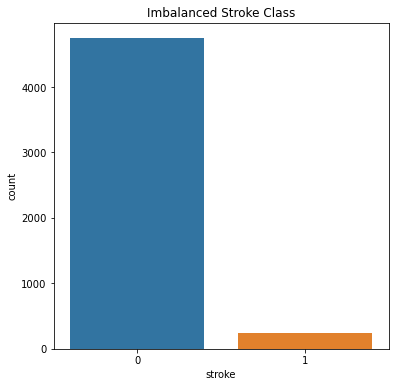

In [67]:
# Plot the stroke value counts with a bar graph
plt.figure(figsize=(6, 6))
sns.countplot('stroke', data=df)
plt.title('Imbalanced Stroke Class')
plt.show();

In [68]:
# Split into X and y
X = df.drop('stroke', axis=1)
y = df['stroke']

In [69]:
X.shape, y.shape

((4992, 19), (4992,))

Before Oversampling:  Counter({0: 4746, 1: 246})
After Oversampling: Counter({1: 4746, 0: 4746})


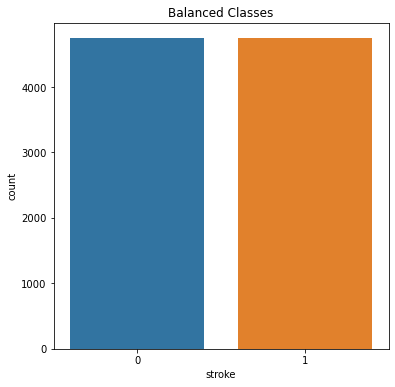

In [71]:
# Oversample and plot imbalanced dataset with SMOTE

# summarize class distribution
print("Before Oversampling: ", Counter(y))

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

Counter(y_sm)
print(f"After Oversampling: {Counter(y_sm)}")

# Plot the dataframe after oversampling
plt.figure(figsize=(6, 6))
sns.countplot(x = y_sm, data = df)
plt.title('Balanced Classes')
plt.show();

In [72]:
# Train with the new data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 42)

We're going to be using 3 models to evaluate the oversampled dataset:

1. KNeighborsClassifier
2. Logistic Regression
3. RandomForestClassifier

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, model.fit(X_train, y_train) and for scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct).

Metrics:

* Precision is the total number of people the model correctly identified as having a stroke out of all the people PREDICTED to have a stroke

* Recall is the total number of people the model correctly identified as a having a stroke out of all the people who ACTUALLY HAD a stroke.

* Accuracy is the total number of correct predictions divided by the total number of predictions.

* It is not possible to achieve both a high precision and a high recall value- we must determine which is more important for us in our model.

* F1 gives us the harmonic mean of precision and recall (Aim for a high F1 value to indicate a good precision and a good recall value).

* ROC (Receiver Operating Characteristic) Curve is a plot betwen the True Positive Rate on the y-axis and the False Positive Rate on the x-axis. A plot with the graph closer to the left and top axes is indicative of a better model.

* AUC (Area Under Curve) values range from 0 to 1 with higher scores indicating a better model. The diagonal line on ROC curves usually represents a random model with an AUC of 0.5. (Would definitely want our model's AUC to be higher than 0.5, since that would signify it is better than random chance.

* PRC (Precision-Recall Curves) plot values of precision scores on the y-axis and recall on the x-axis. A plot with the graph closer to the top and right axes is indicative of a better model. As with ROC curves, we should aim for a high AUC.

### 5.1 Logistic Regression

<a id="logreg"></a>

In [76]:
# Logistic Regression
np.random.seed(42)

# Instantiate the model
log_reg=LogisticRegression()

# Fit the model
log_reg.fit(X_train,y_train)

# Score the model on the test data
log_reg.score(X_test, y_test)

0.8404423380726699

In [79]:
# Make predictions on the model
y_pred_log_reg=log_reg.predict(X_test)
y_pred_log_reg[:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [78]:
y_test[:10]

965     0
4598    0
5009    1
6580    1
1595    0
7007    1
3971    0
1112    0
8158    1
2152    0
Name: stroke, dtype: int64

In [80]:
print(classification_report(y_test,y_pred_log_reg));

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       958
           1       0.84      0.84      0.84       941

    accuracy                           0.84      1899
   macro avg       0.84      0.84      0.84      1899
weighted avg       0.84      0.84      0.84      1899



In [81]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log_reg), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log_reg), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log_reg), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_log_reg), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_log_reg), 2))

Precision Score:  0.84
Recall Score:  0.84
F1 Score:  0.84
Accuracy Score:  0.84
ROC AUC:  0.84


### 5.1.1 Confusion Matrix of LogisticRegression Model

<a id="logreg"></a>

[[802 156]
 [147 794]]


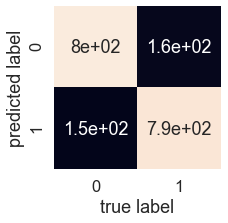

In [82]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred_log_reg):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_log_reg),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred_log_reg)
print(confusion_matrix(y_test,y_pred_log_reg))

You can see the model gets confused (predicts the wrong label). In essence, there are 156 occasaions where the model predicted 0 when it should've been 1 (false negative) and 147 occasions where the model predicted 1 instead of 0 (false positive).

### 5.1.2 ROC Curve and AUC Scores for the Logistic Regression model

<a id="logreg"></a>

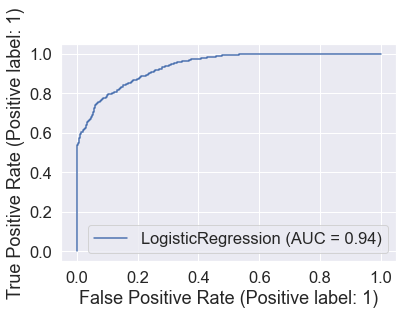

In [83]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(log_reg, X_test, y_test);

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.94. But a perfect model would achieve an AUC score of 1.0.

### 5.2 KNeighborsClassifier

<a id="neighbors"></a>

In [84]:
np.random.seed(42)

# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Score the model on the test data
knn.score(X_test, y_test)

0.9067930489731437

In [86]:
# Make predictions on the model
knn_pred = knn.predict(X_test)
knn_pred[:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [87]:
y_test[:10]

965     0
4598    0
5009    1
6580    1
1595    0
7007    1
3971    0
1112    0
8158    1
2152    0
Name: stroke, dtype: int64

In [88]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       958
           1       0.85      0.99      0.91       941

    accuracy                           0.91      1899
   macro avg       0.92      0.91      0.91      1899
weighted avg       0.92      0.91      0.91      1899



In [95]:
print('Precision Score: ', round(precision_score(y_test, knn_pred), 2))
print('Recall Score: ', round(recall_score(y_test, knn_pred), 2))
print('F1 Score: ', round(f1_score(y_test, knn_pred), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, knn_pred), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, knn_pred), 2))

Precision Score:  0.85
Recall Score:  0.99
F1 Score:  0.91
Accuracy Score:  0.91
ROC AUC:  0.91


### 5.2.1 Confusion Matrix of KNeighborsClassifier Model

<a id="neighbors"></a>

[[791 167]
 [ 10 931]]


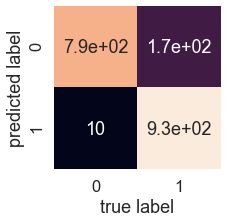

In [89]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, knn_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, knn_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, knn_pred)
print(confusion_matrix(y_test, knn_pred))

There are 167 occasaions where the model predicted 0 when it should have been 1 (false negative) and 10 occasions where the model predicted 1 instead of 0 (false positive).

### 5.2.2 ROC Curve and AUC Scores for the KNeighborsClassifier Model

<a id="neighbors"></a>

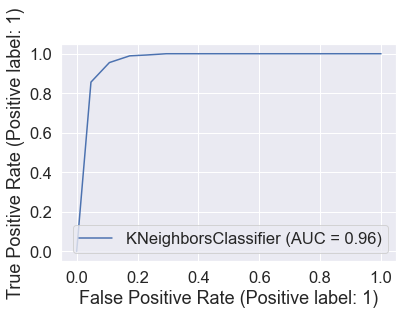

In [90]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(knn, X_test, y_test);

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.96. But a perfect model would achieve an AUC score of 1.0.

### 5.3 Random Forest

<a id="forest"></a>

In [91]:
np.random.seed(42)

# Instantiate the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X_train, y_train)

# Score the model on the test data
rfc.score(X_test, y_test)

0.9515534491837809

In [92]:
# Make predictions on the model
rfc_pred = rfc.predict(X_test)
rfc_pred[:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [93]:
y_test[:10]

965     0
4598    0
5009    1
6580    1
1595    0
7007    1
3971    0
1112    0
8158    1
2152    0
Name: stroke, dtype: int64

In [94]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       958
           1       0.92      0.98      0.95       941

    accuracy                           0.95      1899
   macro avg       0.95      0.95      0.95      1899
weighted avg       0.95      0.95      0.95      1899



In [96]:
print('Precision Score: ', round(precision_score(y_test, rfc_pred), 2))
print('Recall Score: ', round(recall_score(y_test, rfc_pred), 2))
print('F1 Score: ', round(f1_score(y_test, rfc_pred), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, rfc_pred), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, rfc_pred), 2))

Precision Score:  0.92
Recall Score:  0.98
F1 Score:  0.95
Accuracy Score:  0.95
ROC AUC:  0.95


### 5.3.1 Confusion Matrix of RandomForest Model

<a id="forest"></a>

[[882  76]
 [ 16 925]]


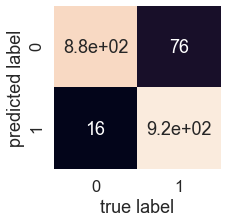

In [97]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, rfc_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, rfc_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, rfc_pred)
print(confusion_matrix(y_test,rfc_pred))

There are 76 occasaions where the model predicted 0 when it should've been 1 (false negative) and 16 occasions where the model predicted 1 instead of 0 (false positive).

### 5.3.2 ROC Curve and AUC Scores for the RandomForestClassifier Model

<a id="forest"></a>

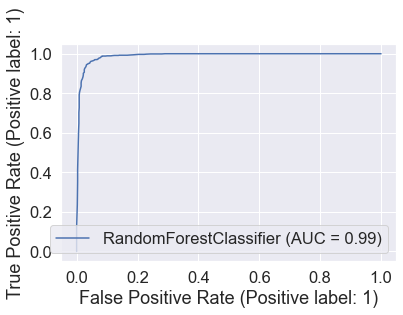

In [98]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rfc, X_test, y_test);

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.99. But a perfect model would achieve an AUC score of 1.0.

### 5.4 Correlation between independent variables

<a id="correlation"></a>

In [99]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
age,1.000000,0.279439,0.265650,0.681758,0.234709,0.375608,0.246766,0.026396,-0.026396,0.129385,-0.078879,0.122302,0.329499,-0.637420,-0.014201,0.014201,-0.384013,0.238983,0.122732,0.075204
hypertension,0.279439,1.000000,0.112666,0.166657,0.170371,0.152624,0.130629,-0.021259,0.021259,0.018030,-0.021625,0.000735,0.108307,-0.129844,0.007064,-0.007064,-0.140910,0.057229,0.065232,0.032478
heart_disease,0.265650,0.112666,1.000000,0.116883,0.168375,0.060916,0.135681,-0.085292,0.085292,0.001953,-0.016064,0.000877,0.088035,-0.093906,-0.001406,0.001406,-0.068086,0.068720,-0.022499,0.044856
ever_married,0.681758,0.166657,0.116883,1.000000,0.151549,0.371626,0.109481,0.027840,-0.027840,0.135872,-0.091319,0.157352,0.194964,-0.548301,-0.005465,0.005465,-0.338726,0.175532,0.102976,0.110233
avg_glucose_level,0.234709,0.170371,0.168375,0.151549,1.000000,0.171816,0.130086,-0.057846,0.057846,0.012048,-0.014425,0.020705,0.058686,-0.101236,0.000102,-0.000102,-0.096645,0.068840,0.023153,0.020162
bmi,0.375608,0.152624,0.060916,0.371626,0.171816,1.000000,0.053121,0.002080,-0.002080,0.090255,-0.027278,0.213058,0.088054,-0.482460,-0.013617,0.013617,-0.297856,0.121538,0.113119,0.101109
stroke,0.246766,0.130629,0.135681,0.109481,0.130086,0.053121,1.000000,-0.009486,0.009486,0.004046,-0.015147,0.013080,0.061692,-0.085576,-0.014043,0.014043,-0.056028,0.067541,-0.007046,0.010128
sex_Female,0.026396,-0.021259,-0.085292,0.027840,-0.057846,0.002080,-0.009486,1.000000,-1.000000,0.016787,-0.010996,0.026956,0.031641,-0.086651,-0.006503,0.006503,-0.059437,-0.044819,0.101837,-0.013411
sex_Male,-0.026396,0.021259,0.085292,-0.027840,0.057846,-0.002080,0.009486,-1.000000,1.000000,-0.016787,0.010996,-0.026956,-0.031641,0.086651,0.006503,-0.006503,0.059437,0.044819,-0.101837,0.013411
work_Govt_job,0.129385,0.018030,0.001953,0.135872,0.012048,0.090255,0.004046,0.016787,-0.016787,1.000000,-0.025514,-0.440718,-0.167774,-0.153192,-0.012847,0.012847,-0.097338,0.031111,0.044841,0.031529


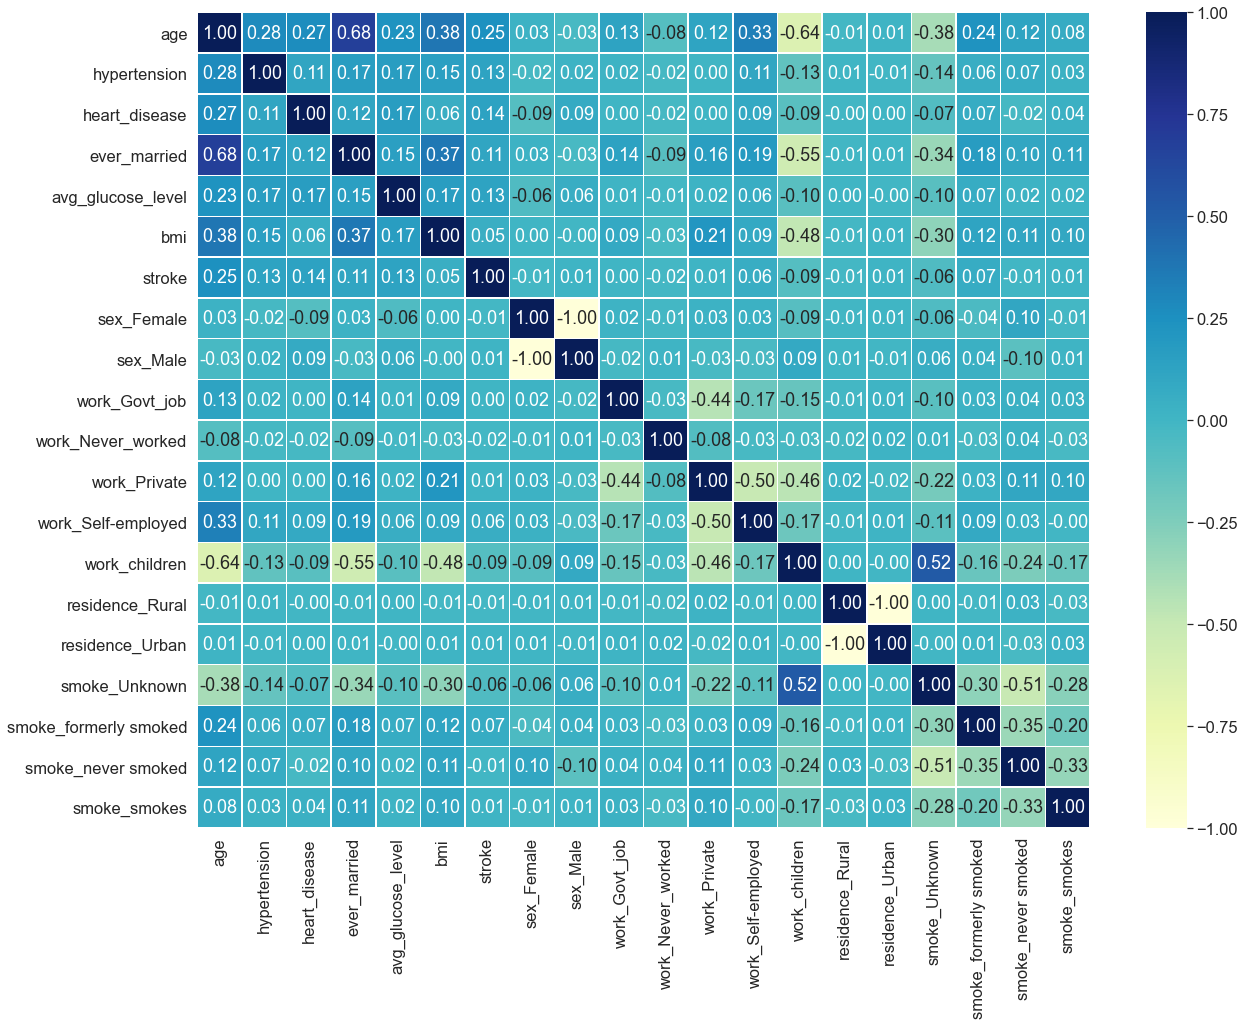

In [100]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**Observation:**
    
It looks like there is no correlation between the independent variables. The only correlation is between **age** and **ever_married** and that is because as people get older, they tend to get married and settle down. 

##  **6. Conclusion**

<a id="conclusion"></a>

<p style="text-align:center;">Given its high scores across the board, particularly in recall, I would say we should choose the random forest classifier. With such a high F1 score we can be quite confident in our pick. This model should be quite reliable at predicting which people are most at risk for having a stroke and which do not need unnecessary treatment.</p>

### Thanks for viewing this Notebook.